# 可视化文件夹中的图像

同济子豪兄 https://space.bilibili.com/1900783

代码运行[云GPU平台](https://featurize.cn/?s=d7ce99f842414bfcaea5662a97581bd1)

2022-7-31

## 导入工具包

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from mpl_toolkits.axes_grid1 import ImageGrid
%matplotlib inline

import numpy as np
import math
import os

import cv2

from tqdm import tqdm
import pandas as pd


## 指定要可视化图像的文件夹

In [3]:
folder_path = r'F:\SewerData_split\train\AJ'

In [4]:
# 可视化图像的个数
N = 36

In [5]:
# n 行 n 列
n = math.floor(np.sqrt(N))
n

6

## 读取文件夹中的所有图像

In [6]:
images = []
for each_img in os.listdir(folder_path)[:N]:
    img_path = os.path.join(folder_path, each_img)
    img_bgr = cv2.imread(img_path)
    img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
    images.append(img_rgb)

In [7]:
len(images)

36

## 画图

C:\Users\admin\.conda\envs\python3.7\lib\site-packages\ipykernel_launcher.py:13: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  del sys.path[0]


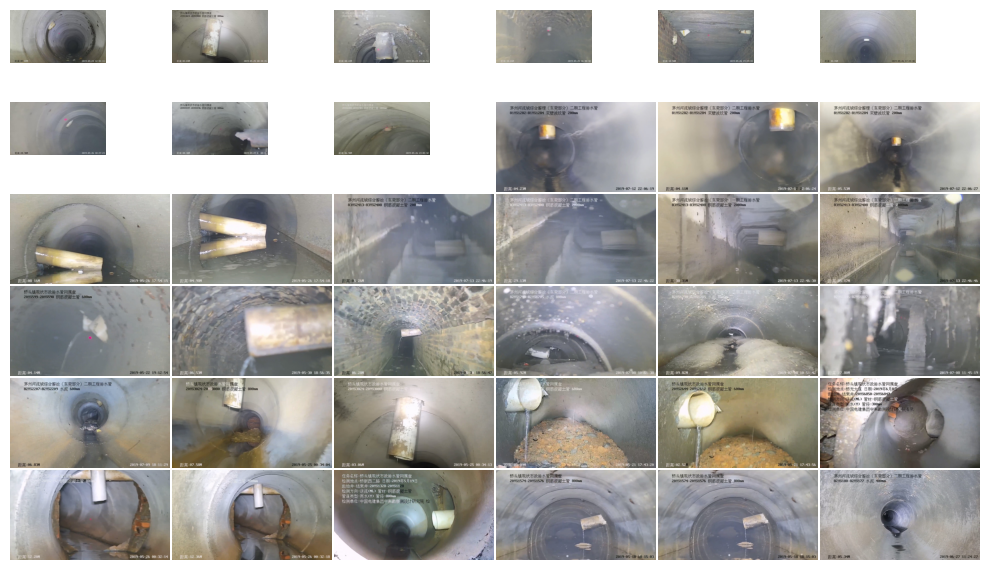

In [8]:
fig = plt.figure(figsize=(10, 10))
grid = ImageGrid(fig, 111,  # 类似绘制子图 subplot(111)
                 nrows_ncols=(n, n),  # 创建 n 行 m 列的 axes 网格
                 axes_pad=0.02,  # 网格间距
                 share_all=True
                 )

# 遍历每张图像
for ax, im in zip(grid, images):
    ax.imshow(im)
    ax.axis('off')

plt.tight_layout()
plt.show()

In [3]:
dataset_path = r'F:\SewerData_split\train'
os.chdir(dataset_path)
os.listdir()


['AJ',
 'BX',
 'CJ',
 'CK',
 'CQ',
 'CR',
 'FS',
 'FZ',
 'JG',
 'PL',
 'QF',
 'SG',
 'SL',
 'TJ',
 'TL',
 'ZW']

In [4]:
df = pd.DataFrame()
for fruit in tqdm(os.listdir()): # 遍历每个类别
    os.chdir(fruit)
    for file in os.listdir(): # 遍历每张图像
        try:
            img = cv2.imread(file)
            df = df.append({'类别':fruit, '文件名':file, '图像宽':img.shape[1], '图像高':img.shape[0]}, ignore_index=True)
        except:
            print(os.path.join(fruit, file), '读取错误')
    os.chdir('../')
os.chdir('../')
df

100%|██████████| 16/16 [00:12<00:00,  1.27it/s]


,类别,文件名,图像宽,图像高
0,AJ,11.jpg,1280.0,720.0
1,AJ,12.jpg,1280.0,720.0
2,AJ,13.jpg,1280.0,720.0
3,AJ,15.jpg,1280.0,720.0
4,AJ,16.jpg,1280.0,720.0
...,...,...,...,...
884,ZW,d6102.mp4_20230504_221437.710.jpg,1514.0,852.0
885,ZW,d6120.mp4_20230504_221447.562.jpg,1514.0,852.0
886,ZW,d6142.mp4_20230504_221457.257.jpg,1514.0,852.0
887,ZW,d6142.mp4_20230504_221502.241.jpg,1514.0,852.0
